# Introduction

At the heart of any data science workflow is data exploration. Most commonly, we explore data by using the following:

- Statistical methods (measuring averages, measuring variability, etc.)
- Data visualization (transforming data into a visual form)

This indicates that one of the central tasks of data visualization is to help us explore data.

The other central task is to help us communicate and explain the results we've found through exploring data. That being said, we have two kinds of data visualization:

- Exploratory data visualization: we build graphs for ourselves to explore data and find patterns.
- Explanatory data visualization: we build graphs for others to communicate and explain the patterns we've found through exploring data.

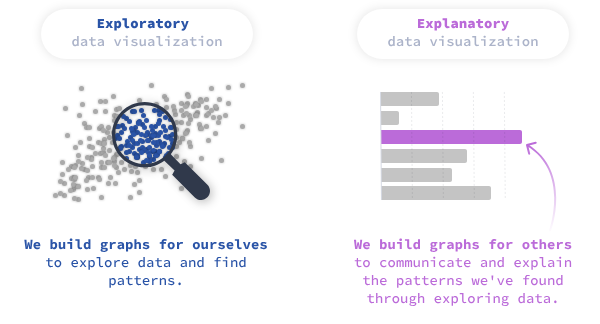

In this first course, we're going to focus on exploratory data visualization. The main visualization library we're going to use is Matplotlib. We're going to learn the following:

- How to visualize time series data with line plots.
- What are correlations and how to visualize them with scatter plots.
- How to visualize frequency distributions with bar plots and histograms.
- How to speed up our exploratory data visualization workflow with the pandas library.
- How to visualize multiple variables using Seaborn's relational plots.


In the second course, our focus will be explanatory data visualization. We'll learn about graph aesthetics, information design principles, storytelling data visualization, customizing graphs with Matplotlib, and more.

## Graphs

Before we get into Matplotlib and start exploring a dataset, we'll go through a brief introduction to graphs — what they are and how to build them mathematically.

We can create a graph by drawing two lines at right angles to each other. Each line is called an axis — the horizontal line at the bottom is the x-axis, and the vertical line on the left is the y-axis. The point where the two lines intersect is called the origin.

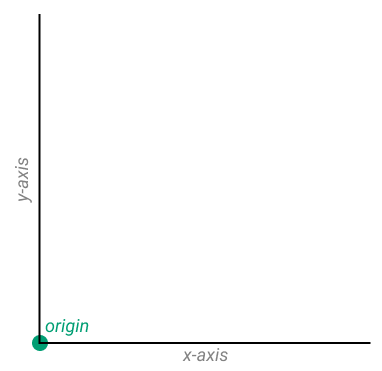

Each axis has length — below, we see both axes marked with numbers, which represent unit lengths.

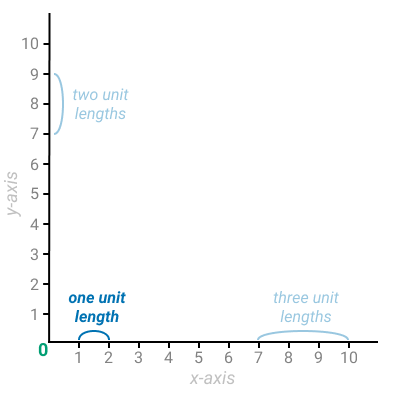

The length of the axes helps us precisely locate any point drawn on the graph. Point A on the graph below, for instance, is seven length units away from the y-axis and two units away from the x-axis.

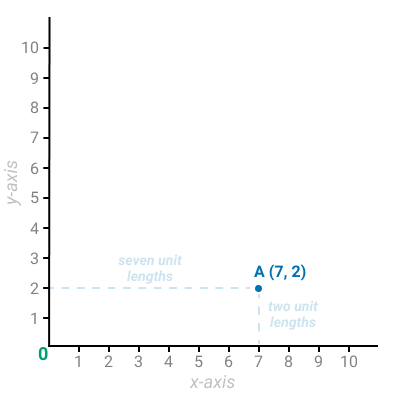

The coordinates are typically represented as an ordered pair (x, y), where x is the x-coordinate and y is the y-coordinate. For example, the coordinates of point A are (7, 2). Here's what we need to know about coordinates:

- The x-coordinate shows the distance in unit lengths relative to the y-axis.
- The y-coordinate shows the distance in unit lengths relative to the x-axis.

The unit lengths of the x- and y-axes don't have to be the same. Below, we see the unit of length on the x-axis is 10, while on the y-axis it is 1,000 (note that we can also hide some of the numbers to make the graph look better).

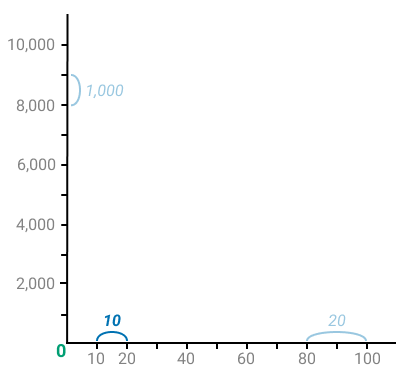

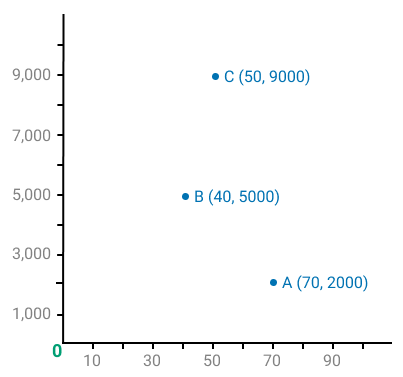

In [1]:
x_unit_length = 10
y_unit_length = 1000
x_coordinate_A = 70
y_coordinate_B = 5000
C_coordinates = [50, 9000]

## Line Graphs

We're going to create a graph using a small dataset.

Below, we see a table showing the number of new COVID-19 infections reported world-wide for the first seven months of 2020:

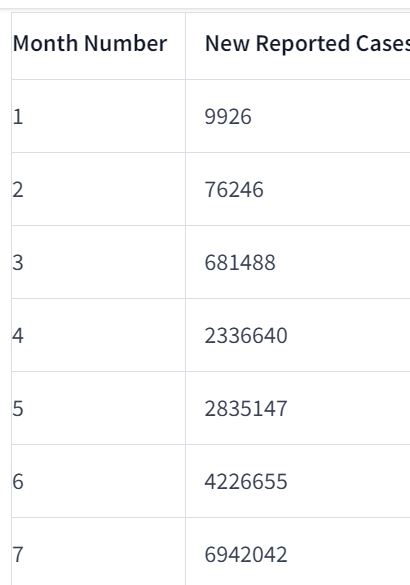

Source: [WHO Covid Data](https://data.who.int/dashboards/covid19/cases)

Each row shows a pair of two connected data points:

1. The month number (where one means January, two means February, and so on)
2. The number of cases reported for that month

When we have a pair of two numbers, we can map it on a graph by using the two numbers as coordinates. Below, we added a point corresponding to the coordinates (5, 2835147) — this corresponds to the month of May. Behind the curtains, we generated the graph using Matplotlib, which we'll introduce soon

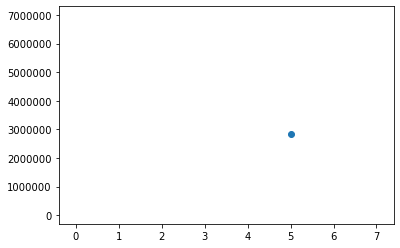

Let's now put all the data in the table on the graph following the same method:

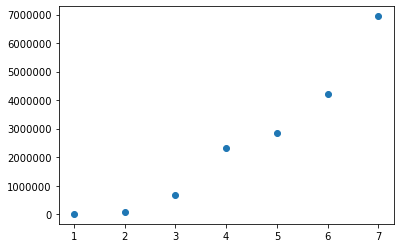

When we graph how something changes over time, we connect all the points with a line — above, we graphed how the number of new COVID-19 cases changed month by month.

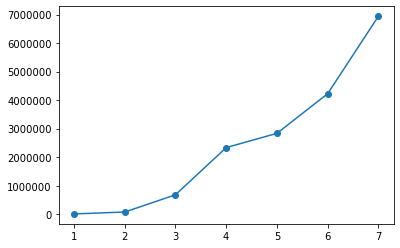

Because we use lines to connect the points, the graph above is a line graph (also known as a line plot, or line chart; the distinction between graph, plot and chart is ambiguous in the data visualization world, with different authors assigning slightly different meanings to these terms — in this course, we use all three synonymously).

When we create line graphs, it's common to hide the points on the line:

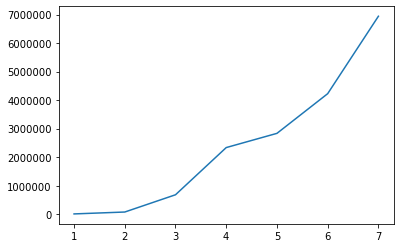

By looking at the line graph we built for our table above, we can see a few patterns.

Overall, the line shows an upward direction, which indicates the number of new reported cases has gone up month by month and has never decreased or stabilized. This is mostly a result of the virus spreading. Countries also started to test more people, which increased the number of new reported cases.

The line connecting January to March has a moderate upward steepness (the January-February line is almost horizontal), which indicates a moderate increase in the number of new reported cases. In that period, the virus was just starting to spread around the world, and many countries were testing people only when they got to the hospital.

The March-April line is very steep, indicating a surge in new reported cases. The April-May line shows a mild steepness, so the number of new cases remained high (around three million). However, the number didn't increase too much compared to April — this is most likely due to the worldwide lockdowns.

The May-July line is very steep, indicating another surge in the number of cases (from about three million to approximately seven million). This is most likely because of ending the lockdowns, which created the conditions for more virus spreading.

Learning how to interpret graphs is just as important as knowing how to build them.

## Matplotlib

We learned about line graphs, but we haven't yet discussed how to create one with code. Recall that we examined a line graph showing the evolution of new reported cases over the first seven months of 2020.

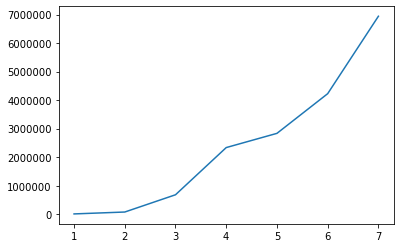

We can build this line graph ourselves using Matplotlib, a Python library specifically designed for creating visualizations. Let's start by importing Matplotlib.

In [2]:
import matplotlib.pyplot as plt

It's common practice to import the pyplot submodule instead of the whole module: import matplotlib.pyplot instead of import matplotlib.

When importing matplotlib.pyplot, it's conventional to use the plt alias (import matplotlib.pyplot as plt). This alias is widely used in the community and documentation.

The pyplot submodule is a collection of high-level functions we can use to generate graphs very quickly. To create our line graph above, we need to:

- Add the data to the [plt.plot() function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).
- Display the plot using the [plt.show() function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

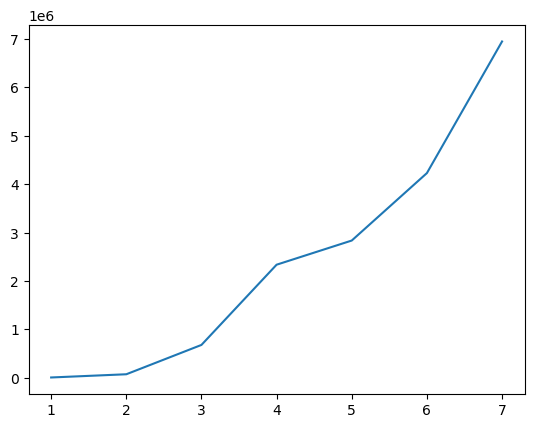

In [3]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_cases = [9926, 76246, 681488, 2336640,
             2835147, 4226655, 6942042]

plt.plot(month_number, new_cases)
plt.show()

We see a rather odd "1e6" sign on the top left section of the graph. This is scientific notation, and it tells us that the values on the y-axis are multiplied by 106. This means that a seven on the y-axis means 7 multiplied by 106, which is seven million — we'll get back to this on the next screen.

The plt.plot() function generates a line graph by default. All it needs is two arrays of data of the same length — these can be Python lists, pandas Series, NumPy arrays, etc. Above, we used two Python lists.

Notice the order of arguments in plt.plot(month_number, new_cases): month_number comes first, followed by new_cases. The array that comes first gives the x-coordinates, and the second array gives the y-coordinates.

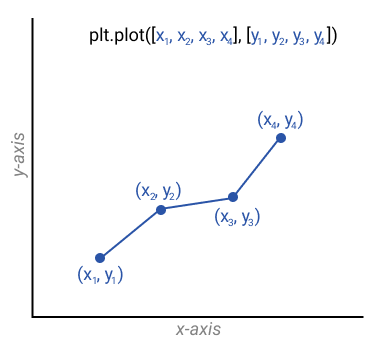

The two arrays must be equal in length, or some coordinates will remain unpaired, and will raise an error.

In [4]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_deaths = [213, 2729, 37718, 184064, 143119, 136073, 165003]

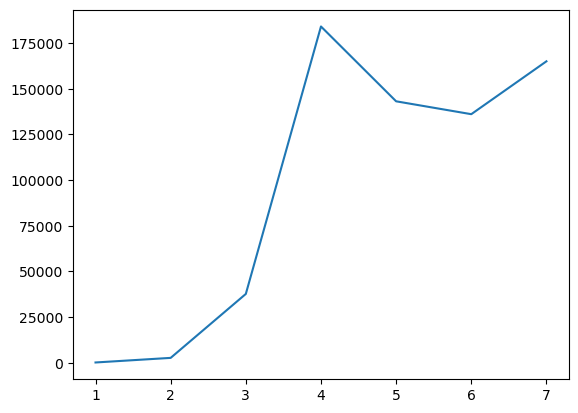

In [6]:
plt.plot(month_number, new_deaths)
plt.show()

## Customizing a Graph

We built a line graph showing the evolution of new cases by month:

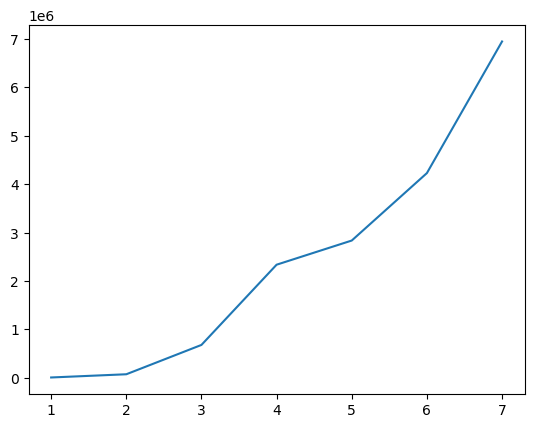

In [7]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_cases = [9926, 76246, 681488, 2336640,
             2835147, 4226655, 6942042]

import matplotlib.pyplot as plt
plt.plot(month_number, new_cases)
plt.show()

On the top left side of the graph, we see an "1e6" sign — this is scientific notation. Matplotlib changes to scientific notation if one value on the axis needs to be one million or greater.

If we want to remove scientific notation, we can use the [plt.ticklabel_format(axis, style) function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ticklabel_format.html).

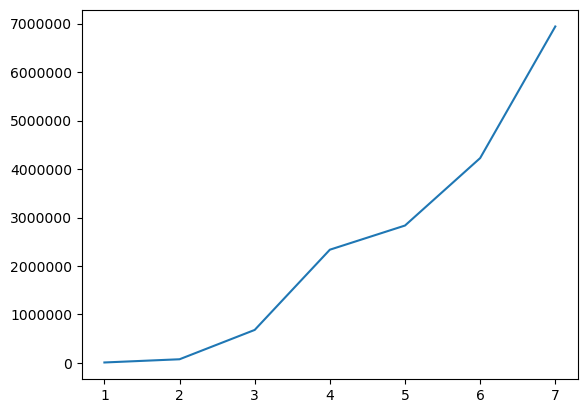

In [8]:
plt.plot(month_number, new_cases)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

The axis parameter defines which axis to configure — its arguments are the strings 'x', 'y', and 'both'.

The style parameter controls the notation style (plain or scientific). Its arguments are 'sci', 'scientific', and 'plain'.

The next thing we're going to do is use the [plt.title() function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) to add a title to our line graph.

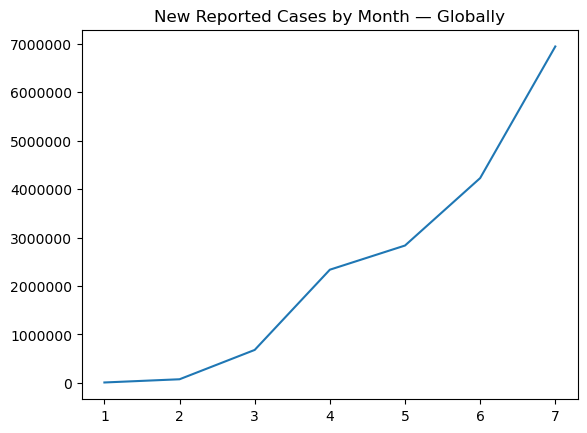

In [9]:
plt.plot(month_number, new_cases)
plt.ticklabel_format(axis='y', style='plain')
plt.title('New Reported Cases by Month — Globally')
plt.show()

The x-axis shows the month number, and the y-axis shows the number of new reported cases. We can show this on our graph by adding a label to each axis — an x-label and a y-label. To add axis labels, we use [plt.xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) and [plt.ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html).

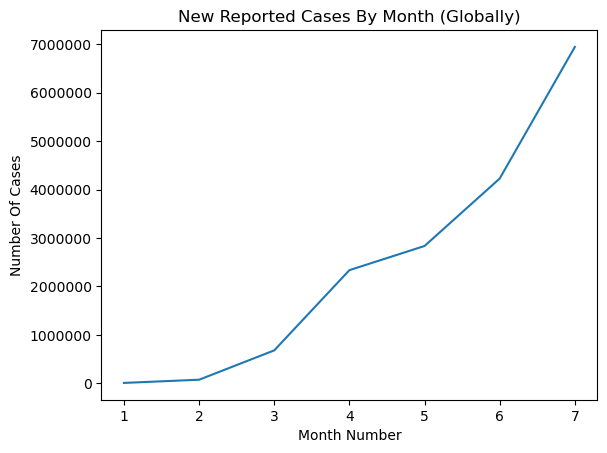

In [10]:
plt.plot(month_number, new_cases)
plt.ticklabel_format(axis='y', style='plain')
plt.title('New Reported Cases By Month (Globally)')
plt.xlabel('Month Number')
plt.ylabel('Number Of Cases')
plt.show()

Adding a title and axis labels is always a good thing — even if we're just exploring data for ourselves and no one else will ever see our work.

We create many graphs when we explore data, and we often lose track of what each graph describes. If we plot a graph now and then examine it again forty minutes later, the title and the axis labels will help us immediately determine what that graph is about.

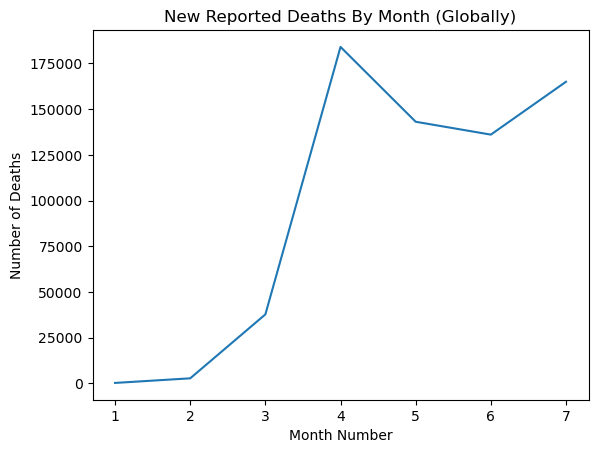

In [12]:
plt.plot(month_number, new_deaths)
# plt.ticklabel_format(axis='y', style='plain')
plt.title('New Reported Deaths By Month (Globally)')
plt.xlabel('Month Number')
plt.ylabel('Number of Deaths')
plt.show()

## WHO Time Series Data

Next, we're going to use a larger dataset that we've collected from the [World Health Organization](https://data.who.int/dashboards/covid19/cases).

Let's read in the dataset using the pandas library:

In [13]:
import pandas as pd

In [14]:
who_time_series = pd.read_csv('../../Datasets/WHO_time_series.csv')

In [15]:
who_time_series.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,China,1,1,0,0
1,2020-01-05,China,0,1,0,0
2,2020-01-06,China,3,4,0,0
3,2020-01-07,China,0,4,0,0
4,2020-01-08,China,0,4,0,0


The dataset contains data from January 4 until July 31. Each row describes the COVID-19 report for one day in one specific country (the first few rows show only China because the virus was only present in China at that time).

For each row, we have the following data points:

- Date_reported: The date when the data was reported in year-month-day format.
- Country: The country to which the report corresponds.
- New_cases: The number of new cases reported for that date and for that country.
- Cumulative_cases: The number of total cases up to that date in that country.
- New_deaths: The number of new deaths reported for that date and for that country.
- Cumulative_deaths: The number of total deaths up to that day in that country.

The rows in our dataset are listed in time order, starting with January 4 and ending with July 31. We call a series of data points that is listed in time order a time series.

Typically we visualize time series with line graphs. The time values are always plotted, by convention, on the x-axis.

In [16]:
# convert date to datetime object
who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])
who_time_series.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,China,1,1,0,0
1,2020-01-05,China,0,1,0,0
2,2020-01-06,China,3,4,0,0
3,2020-01-07,China,0,4,0,0
4,2020-01-08,China,0,4,0,0


In [17]:
who_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      31876 non-null  datetime64[ns]
 1   Country            31876 non-null  object        
 2   New_cases          31876 non-null  int64         
 3   Cumulative_cases   31876 non-null  int64         
 4   New_deaths         31876 non-null  int64         
 5   Cumulative_deaths  31876 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ MB


## Types of Line Graphs

Line graphs are a great way to visualize trends in data over time, and by examining the shape and direction of the line, we can understand how a particular metric has changed.

Let's look at some examples using our dataset.

#### Exponential Rise: India's New Cases
Exponential patterns occur when the rate of increase accelerates over time, leading to a sharp upward curve. In the code below, we begin by isolating the data for India, and then we create the plot:

In [19]:
# isolate the data for india
india = who_time_series[who_time_series['Country'] == 'India' ]

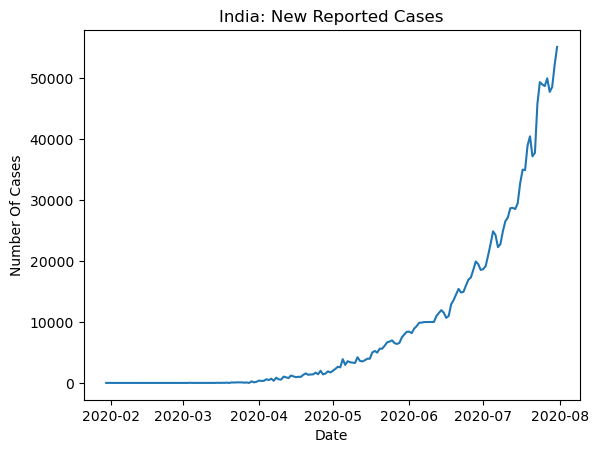

In [21]:
plt.plot(india['Date_reported'], india['New_cases'])
plt.title('India: New Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

In the graph, we observe that the number of new cases in India starts with a slow increase but then rises rapidly during the April-August period. This type of curve is typical in situations where the rate of change is proportional to the current amount, resulting in an exponential rise. After the surge, we would expect the curve to eventually flatten or change direction as various factors influence the spread.

#### Steady Increase: Linear Trends in Poland
Now, let's plot a line graph for Poland to see another type of growth:

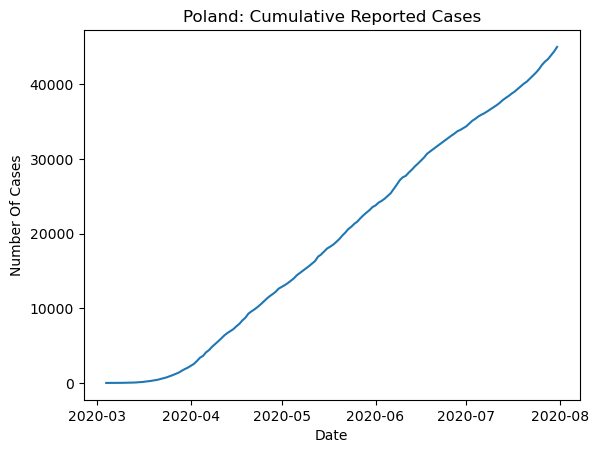

In [22]:
poland = who_time_series[who_time_series['Country'] == 'Poland']

plt.plot(poland['Date_reported'], poland['Cumulative_cases'])
plt.title('Poland: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

In this graph of cumulative cases in Poland, the line increases at a relatively steady pace, showing a nearly linear trend over time. This indicates that new cases were being added at a fairly consistent rate during this period, though it's important to remember that cumulative data is naturally upward trending.

Generally, a quantity that increases constantly over time has linear growth.

#### Slowing Increase: Logarithmic Patterns
Logarithmic patterns occur when data rises quickly at first but then slows down over time, creating a curve that flattens out. While this pattern is less common in the context of COVID-19 data, it helps to understand this type of trend as it can occur in other contexts where initial rapid growth gradually slows as limits are reached.

To sum up, these are some of the types of growth we've learned in this screen:

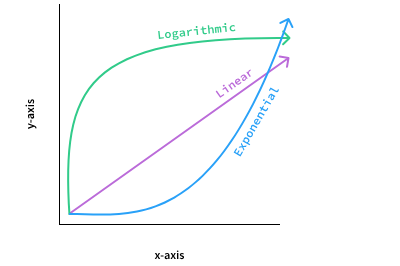

Create a graph showing the cumulative cases reported for Argentina, then determine the type of graph that best-describes what you see.

In [23]:
argentina = who_time_series[who_time_series['Country'] == 'Argentina']

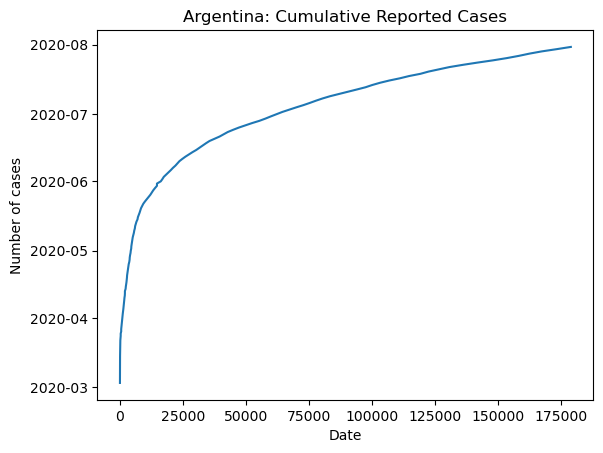

In [25]:
plt.plot(argentina['Cumulative_cases'], argentina['Date_reported'])
plt.title("Argentina: Cumulative Reported Cases")
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.show()

## Types of Change

As a word of caution, labeling a type of graph just by looking at it is far from being precise. These types of graph are best described by precise and well-defined mathematical functions. However, these visual approximations can serve as useful mind tools that we can use to interpret how time series data change.

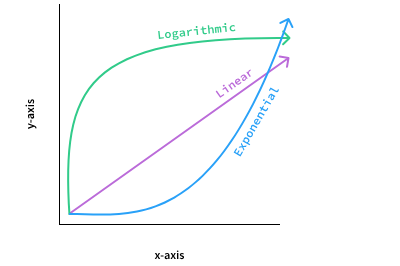

Change is not only about growth, or increases. A quantity can also decrease following a linear, exponential, or logarithmic pattern.

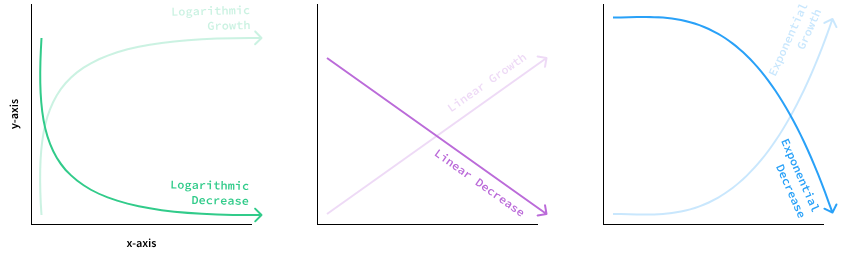

The data, however, rarely fits any of these patterns perfectly. Most often, our line graphs are only approximately linear, approximately exponential, or approximately logarithmic. Moreover, one portion of a single line graph can show an exponential change, another portion of the same graph can show a linear change, while another can show an irregular change that doesn't resemble any common pattern.

In practice, most of the line graphs we plot don't show any clear pattern. We need to pay close attention to what we see and try to extract meaning without forcing the data into some patterns we already know.

If we look at the evolution of new cases in Belarus, for instance, we see many irregularities on the line graph:

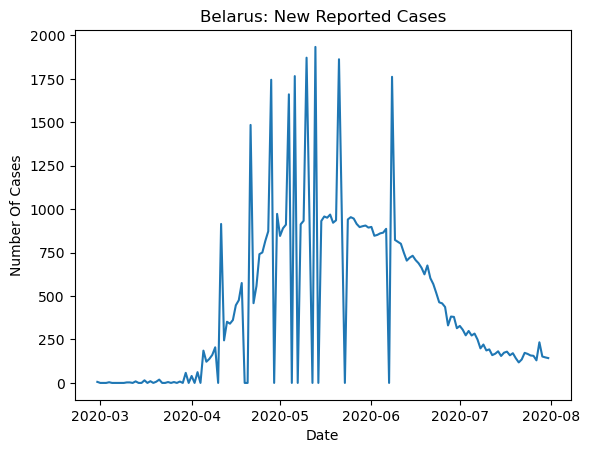

In [26]:
belarus = who_time_series[who_time_series['Country'] == 'Belarus']

plt.plot(belarus['Date_reported'], belarus['New_cases'])
plt.title('Belarus: New Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

In the April-July period, we see several spikes on the graph going either upward or downward. For some days, the number of new cases gets close to 2,000 (the upward spikes), while for others is zero (the downwards spikes). These large variations suggest that the reports didn't arrive daily — it may be that no one sent reports over the weekends or on national holidays. The number of new cases keeps increasing until the next report, and then we see one of those upward spikes.

When we see irregularities on a line graph, this doesn't mean we can't extract any meaning. By analyzing the irregularities, we can sometimes uncover interesting details.

## Comparing Line Graphs

So far, we've learned what line graphs are, how to build one using Matplotlib, and some common types of change. Next, we're going to focus on comparing line graphs.

One of the key elements of data exploration is comparison — how does this value compare to that other value? For our COVID-19 time series, we can formulate many questions in terms of comparison:

- How does the United Kingdom compare to France with respect to the evolution of cumulative new cases?
- How does Mexico compare to the United States with respect to the cummulative number of deaths?
- How does the evolution of new reported cases compare between India, Indonesia, and China?
- How does the evolution of total cases compare between Europe and Asia? Or between Africa and South America?

For instance, let's visualize the evolution of cumulative cases for France and the United Kingdom. Matplotlib allows us to have two line graphs sharing the same x- and y-axis:

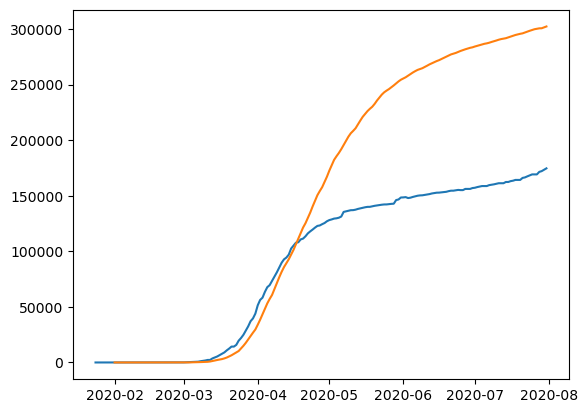

In [27]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']

plt.plot(france['Date_reported'], france['Cumulative_cases'])
plt.plot(uk['Date_reported'], uk['Cumulative_cases'])
plt.show()

We see two lines of different colors above, but we can't tell which is for France and which is for the United Kingdom. To solve this problem, we're going to add a legend that shows which color corresponds to which country. In the code below, we first add a label argument to the plt.plot() function, and then we use the [plt.legend() function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html):

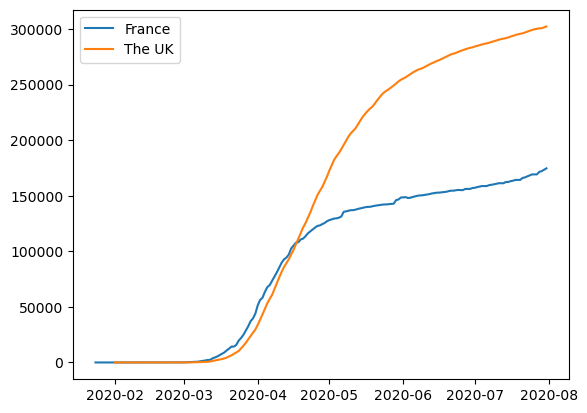

In [28]:
plt.plot(france['Date_reported'], france['Cumulative_cases'],
         label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'],
         label='The UK')
plt.legend()
plt.show()

When we use plt.plot() the first time, Matplotlib creates a line graph. When we use plt.plot() again, Matplotlib creates another line graph that shares the same x- and y-axis as the first graph. If we want Matplotlib to draw the second line graph separately, we need to close the first graph with the [plt.show() function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

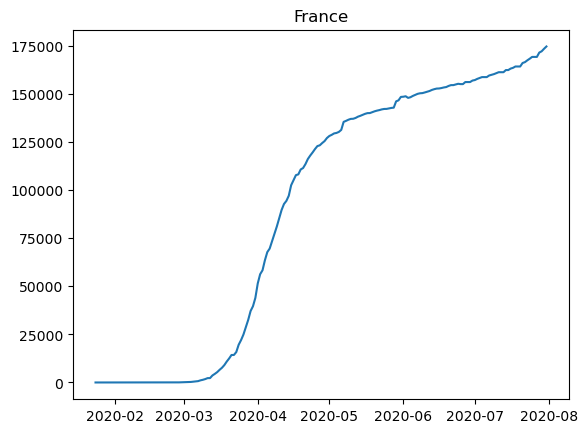

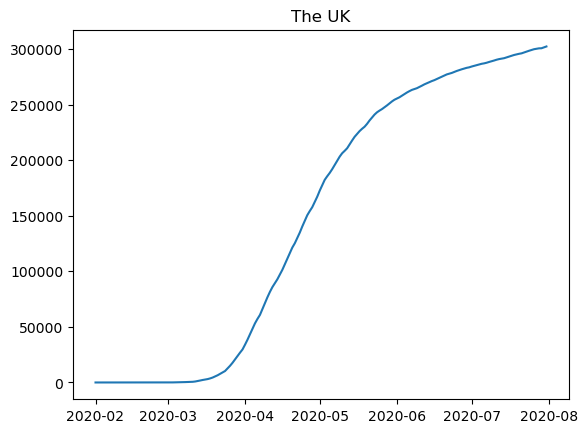

In [29]:
plt.plot(france['Date_reported'], france['Cumulative_cases'])
plt.title('France')
plt.show()

plt.plot(uk['Date_reported'], uk['Cumulative_cases'])
plt.title('The UK')
plt.show()

Looking at the two graphs above, the evolution of cumulative cases looks very similar if we only judge by the shape of the line. If we look on the y-axis, however, we see that the two graphs have different ranges, and the values for the UK are almost twice as large. It's much easier to compare these two visualizations if they share the same axes.

In [44]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']

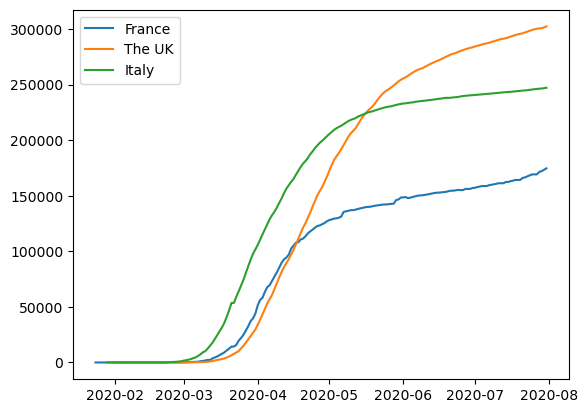

In [48]:
plt.plot(france['Date_reported'], france['Cumulative_cases'], label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'], label='The UK')
plt.plot(italy['Date_reported'], italy['Cumulative_cases'], label='Italy')
plt.legend()

In this lesson, we went through a quick introduction to graphs, and then we learned how to do the following:

- Plot and customize a line graph using Matplotlib
- Visualize time series with line graphs
- Interpret line plots by identifying types of change